In [1]:
import pandas as pd
import numpy as np
import os
import re
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
# Fondo oscuro
#jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
# Fondo blanco
jtplot.style(theme='grade3', context='notebook', ticks=True, grid=True)
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#base = pd.read_excel(r'C:\Users\JOSE\Desktop\Trabajo\BX\Capturas de Venezolanos\Base_final_colapsada.xlsx')
base = pd.read_excel(r'D:\Trabajo\Barómetro\BX\Capturas de Venezolanos\Base_final_colapsada.xlsx')
base

,Unnamed: 0,mes_año,Ubicación,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
0,286,1_2020,Amazonas,0,0,0,0.0,0.0,1,2020
1,352,2_2020,Amazonas,1,1,0,0.0,0.0,2,2020
2,421,3_2020,Amazonas,1,1,0,0.0,0.0,3,2020
3,494,4_2020,Amazonas,1,0,0,0.0,0.0,4,2020
4,570,5_2020,Amazonas,4,0,0,0.0,0.0,5,2020
...,...,...,...,...,...,...,...,...,...,...
1052,847,7_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",1,0,0,0.0,0.0,7,2022
1053,950,8_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.0,8,2022
1054,1056,9_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",3,2,0,0.0,0.0,9,2022
1055,108,10_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.0,10,2022


In [4]:
base_2022 = base[(base['año'] == 2022) 
                 | ((base['año'] == 2021) & (base['mes'] == 11)) 
                 | ((base['año'] == 2021) & (base['mes'] == 12))]
base_2022

,Unnamed: 0,mes_año,Ubicación,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
22,118,11_2021,Amazonas,3,0,0,0.0,0.000000,11,2021
23,234,12_2021,Amazonas,3,0,0,0.0,0.000000,12,2021
24,300,1_2022,Amazonas,14,1,1,1.0,0.071429,1,2022
25,368,2_2022,Amazonas,6,2,1,0.5,0.166667,2,2022
26,440,3_2022,Amazonas,15,1,1,1.0,0.066667,3,2022
...,...,...,...,...,...,...,...,...,...,...
1052,847,7_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",1,0,0,0.0,0.000000,7,2022
1053,950,8_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.000000,8,2022
1054,1056,9_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",3,2,0,0.0,0.000000,9,2022
1055,108,10_2022,"Villavicencio, Meta, Casanare, Amazonas, Guain...",2,0,0,0.0,0.000000,10,2022


In [8]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1.head(20)

,Unnamed: 0,mes_año,Ubicación,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
940,1049,9_2022,Tunja,195,22,13,0.590909,0.066667,9,2022
200,611,5_2022,Bucaramanga,162,11,10,0.909091,0.061728,5,2022
201,702,6_2022,Bucaramanga,98,7,7,1.000000,0.071429,6,2022
203,904,8_2022,Bucaramanga,105,7,7,1.000000,0.066667,8,2022
404,135,11_2021,Cúcuta,60,11,7,0.636364,0.116667,11,2021
202,800,7_2022,Bucaramanga,127,6,6,1.000000,0.047244,7,2022
204,1010,9_2022,Bucaramanga,84,5,5,1.000000,0.059524,9,2022
131,698,6_2022,Bogotá,62,3,3,1.000000,0.048387,6,2022
129,520,4_2022,Bogotá,54,3,3,1.000000,0.055556,4,2022
1021,106,10_2022,Vichada,4,3,2,0.666667,0.500000,10,2022


In [11]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Cali','Cúcuta', 'Bogotá'])]
data_grafico_1 = data_grafico_1.sort_values(by=['Ubicación','mes'], ascending=True)
data_grafico_1 = data_grafico_1.groupby(['Ubicación']).sum()
data_grafico_1 = data_grafico_1.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1

,Unnamed: 0,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
Ubicación,,,,,,,,
Bucaramanga,5236,724,40,39,7.909091,0.386474,63,18198
Bogotá,6239,727,16,15,7.666667,0.252502,89,26284
Tunja,3148,719,27,15,1.090909,0.075000,45,10110
Cúcuta,6449,371,28,14,3.969697,0.308105,89,26284
Cali,6196,663,4,2,2.000000,0.043411,78,24263


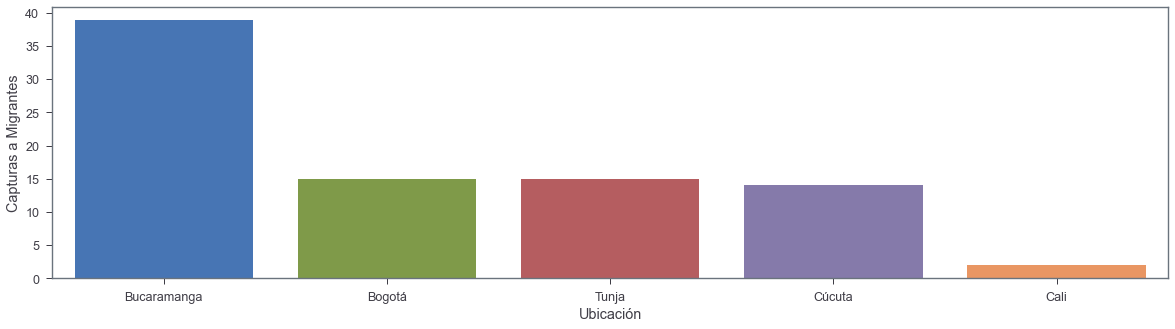

In [12]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=data_grafico_1, x=data_grafico_1.index, y="Capturas Migrantes")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Ubicación", ylabel = 'Capturas a Migrantes')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [13]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Cali','Cúcuta', 'Bogotá'])]
data_grafico_1 = data_grafico_1.sort_values(by=['Ubicación','mes'], ascending=True)
data_grafico_1 = data_grafico_1.groupby(['Ubicación']).sum()
data_grafico_1 = data_grafico_1.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1['Participación migrantes en crimen'] = data_grafico_1['Capturas Migrantes']/data_grafico_1['Capturas']
data_grafico_1 = data_grafico_1.sort_values(by=['Participación migrantes en crimen'], ascending=False)
data_grafico_1

,Unnamed: 0,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año,Participación migrantes en crimen
Ubicación,,,,,,,,,
Bucaramanga,5236,724,40,39,7.909091,0.386474,63,18198,0.053867
Cúcuta,6449,371,28,14,3.969697,0.308105,89,26284,0.037736
Tunja,3148,719,27,15,1.090909,0.075000,45,10110,0.020862
Bogotá,6239,727,16,15,7.666667,0.252502,89,26284,0.020633
Cali,6196,663,4,2,2.000000,0.043411,78,24263,0.003017


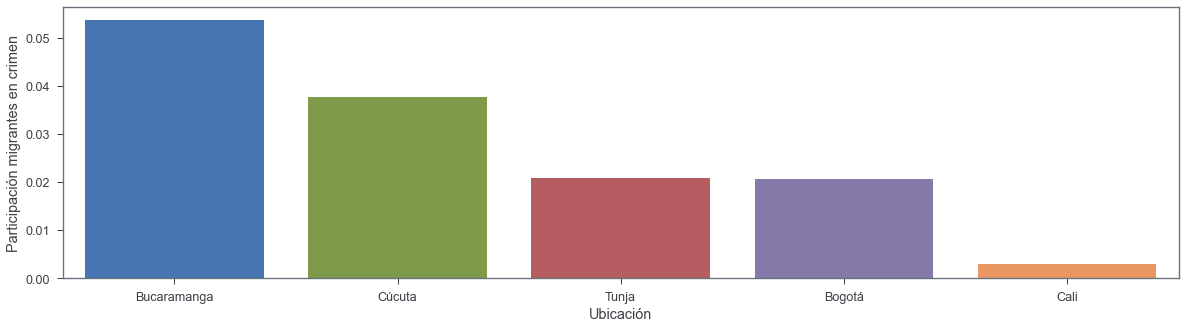

In [14]:
plt.figure(figsize=(20,5))
lines = sns.barplot(data=data_grafico_1, x=data_grafico_1.index, y="Participación migrantes en crimen")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
lines.set(xlabel = "Ubicación", ylabel = 'Participación migrantes en crimen')
#cont.set( ylabel = '')
plt.grid(False)
#ax2.grid(False)

In [38]:
data_grafico_1 = base_2022[base_2022['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Cali','Cúcuta', 'Bogotá'])]
data_grafico_1.head(10)

,Unnamed: 0,mes_año,Ubicación,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
124,122,11_2021,Bogotá,81,1,1,1.000000,0.012346,11,2021
125,239,12_2021,Bogotá,63,3,2,0.666667,0.031746,12,2021
126,305,1_2022,Bogotá,73,1,1,1.000000,0.013699,1,2022
127,373,2_2022,Bogotá,107,0,0,0.000000,0.000000,2,2022
128,445,3_2022,Bogotá,69,2,2,1.000000,0.028986,3,2022
129,520,4_2022,Bogotá,54,3,3,1.000000,0.055556,4,2022
130,607,5_2022,Bogotá,52,1,1,1.000000,0.019231,5,2022
131,698,6_2022,Bogotá,62,3,3,1.000000,0.048387,6,2022
132,796,7_2022,Bogotá,47,2,2,1.000000,0.042553,7,2022
133,900,8_2022,Bogotá,47,0,0,0.000000,0.000000,8,2022


<ipython-input-40-593de8c5a40a>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(data_grafico_1['mes_año'],rotation=45, ha='right')
<ipython-input-40-593de8c5a40a>:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(data_grafico_1['mes_año'],rotation=45, ha='right')


[Text(0.5, 0, 'mes_año'), Text(0, 0.5, 'Capturas Migrantes')]

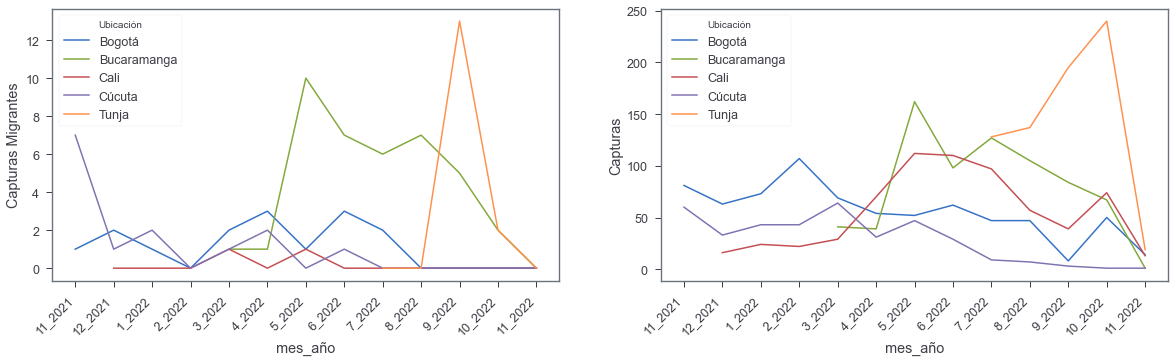

In [40]:
figure, axes = plt.subplots(1, 2, sharex=True, figsize=(20,5))
lines = sns.lineplot(ax=axes[0],data=data_grafico_1, x="mes_año", y="Capturas Migrantes", hue="Ubicación")
lines_2 = sns.lineplot(ax=axes[1],data=data_grafico_1, x="mes_año", y="Capturas", hue="Ubicación")
#sns.move_legend(lines, "upper left", bbox_to_anchor=(1, 1))
#trat = sns.scatterplot(x="Treated", y= "y_coord", data=base_nodos)
#ax2 = ax.twinx()
#cont = sns.scatterplot(x="Control", y= "y_coord", data=base_nodos, ax=ax2)
#plt.axvline(x = 0, color = 'b', label = '')
# add label to the axis and label to the plot
#for i in range(len(Short_name)):
    #plt.annotate(Short_name[i], (base_nodos['Treated'][i]-0.15, base_nodos['y_coord'][i]-0.01) )
   # plt.annotate(Short_name[i], (base_nodos['Control'][i]+0.05, base_nodos['y_coord'][i]-0.01) )
axes[0].set_xticklabels(data_grafico_1['mes_año'],rotation=45, ha='right')
axes[1].set_xticklabels(data_grafico_1['mes_año'],rotation=45, ha='right')
axes[0].grid(False)
axes[1].grid(False)
lines.set(xlabel = "mes_año", ylabel = 'Capturas Migrantes')
#cont.set( ylabel = '')
#figure.grid(False)
#ax2.grid(False)

In [28]:
data_grafico_1 = base_2022.sort_values(by=['Capturas Migrantes'], ascending=False)
data_grafico_1 = data_grafico_1[data_grafico_1['Ubicación'].isin(['Tunja', 'Bucaramanga', 'Cali','Cúcuta', 'Bogotá'])]
print("Promedio Nacional 2022: ")
data_grafico_1['Tasa capturas de migrantes'].mean()

Promedio Nacional 2022: 


0.020490241475992103

In [29]:
pd.unique(base_2022['Ubicación'])

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlantico',
       'Barranquilla, Cartagena, Santa Marta, Atlántico, Bolívar, Magdalena, La Guajira, Sucre, San Andrés Y Providencia, Cesar',
       'Bogotá', 'Bogotá, Boyacá, Cundinamarca', 'Bolivar', 'Boyacá',
       'Bucaramanga',
       'Bucaramanga, Cúcuta, Santander, Norte de Santander, Arauca, Magdalena Medio',
       'Caldas', 'Cali',
       'Cali, Valle del Cauca, Cauca, Nariño, Buenaventura, Tumaco',
       'Caqueta', 'Cartagena', 'Casanare', 'Cauca', 'Cesar', 'Choco',
       'Cordoba', 'Cúcuta', 'Cundinamarca', 'Guainia', 'Guajira', 'Huila',
       'Ibague', 'Ibagué, Tolima, Huila, Caquetá, Putumayo', 'Magdalena',
       'Magdalena Medio', 'Manizales', 'Medellín', 'Meta', 'Monteria',
       'Nacional', 'Nariño', 'Norte de Santander', 'Pasto', 'Pereira',
       'Pereira, Risaralda, Caldas, Quindío', 'Popayan', 'Putumayo',
       'Quindio', 'Risaralda', 'San Andrés y Providencia', 'Santa Marta',
       'Santander', 'Sucre', 'Tolima', 

In [43]:
data_grafico_1 = base[base['Ubicación'].isin(['Antioquia', 'Atlantico', 'Bogotá', 'Vichada', 'Casanare','Caldas','Caqueta','Casanare',
                                                       'Cauca', 'Cesar','Choco','Cordoba','Cundinamarca','Guainia','Guajira','Huila','Magdalena Medio',
                                                       'Nariño','Norte de Santander','San Andrés y Providencia','Vaupes','Vichada','Valle del Cauca','Sucre',
                                                       'Putumayo','Huila','Meta','Arauca','Quindío','Risaralda','Santander','Tolima','Guaviare','Bolivar','Boyacá',
                                             'Amazonas'])]
pd.unique(data_grafico_1['Ubicación'])

array(['Amazonas', 'Antioquia', 'Arauca', 'Atlantico', 'Bogotá',
       'Bolivar', 'Boyacá', 'Caldas', 'Caqueta', 'Casanare', 'Cauca',
       'Cesar', 'Choco', 'Cordoba', 'Cundinamarca', 'Guainia', 'Guajira',
       'Huila', 'Magdalena Medio', 'Meta', 'Nariño', 'Norte de Santander',
       'Putumayo', 'Risaralda', 'San Andrés y Providencia', 'Santander',
       'Sucre', 'Tolima', 'Valle del Cauca', 'Vaupes', 'Vichada'],
      dtype=object)

In [44]:
data_grafico_1 = data_grafico_1.groupby(['Ubicación']).sum()
data_grafico_1

,Unnamed: 0,Capturas,Migrantes,Capturas Migrantes,Tasa de temática migrante,Tasa capturas de migrantes,mes,año
Ubicación,,,,,,,,
Amazonas,17222,212,14,8,7.500000,0.876984,222,70734
Antioquia,6069,488,1,0,0.000000,0.000000,78,24263
Arauca,11927,188,10,3,3.000000,0.171221,167,50534
Atlantico,15166,207,1,0,0.000000,0.000000,207,60634
Bogotá,8073,824,18,17,9.666667,0.366139,116,32347
Bolivar,9533,395,1,0,0.000000,0.000000,129,36389
Boyacá,6293,511,5,3,2.500000,0.099362,99,28305
Caldas,6311,184,3,0,0.000000,0.000000,89,26284
Caqueta,10214,289,4,0,0.000000,0.000000,134,38410


In [45]:
data_grafico_1.to_excel('Participación_migrantes_crimen.xlsx')